In [1]:
import  pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
acc_scorer = make_scorer(accuracy_score)

In [3]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Supression des lignes dans lequelles l'âge n'est pas renseigné : 
df.dropna(subset=['Age'], inplace=True)

df.Age = df.Age.astype(int)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [ ]:
df.Sex = df.Sex.map({'male':0, 'female':1}) # Modification de la colonne 'Sex'

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S


In [8]:
df['Cabin'].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
F33            3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 134, dtype: int64

In [9]:
# Premier tri : 
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis='columns', inplace=True) # colonnes inutiles ou trop de données manquantes

In [11]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,0.365546,29.679272,0.512605,0.431373,34.694514
std,0.491460,0.838250,0.481921,14.536483,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,0.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200


Text(0, 0.5, '%Survie')

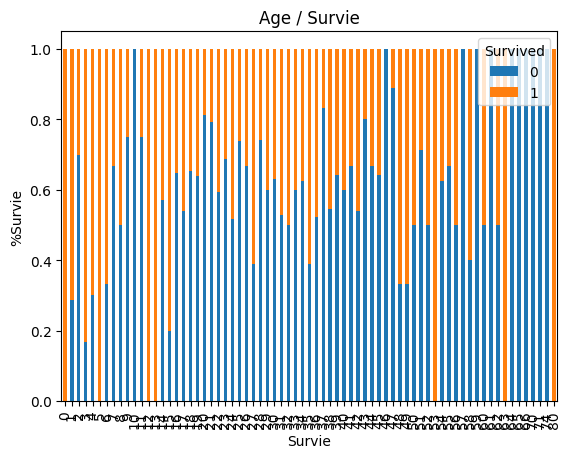

In [13]:
# Influence de l'âge sur la survie : 
import matplotlib.pyplot as plt
table = pd.crosstab(df.Age, df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Age / Survie')
plt.xlabel('Survie')
plt.ylabel('%Survie')

In [ ]:
# Découpage des âges en 5 segments : 
df['AgeBand'] = pd.cut(df['Age'], 5)
df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

C:\Users\matthieu.catteyfaye\AppData\Local\Temp\ipykernel_17368\4228398340.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)


,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.370690
2,"(32.0, 48.0]",0.403226
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [15]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBand
0,0,3,0,22,1,0,7.2500,S,"(16.0, 32.0]"
1,1,1,1,38,1,0,71.2833,C,"(32.0, 48.0]"
2,1,3,1,26,0,0,7.9250,S,"(16.0, 32.0]"
3,1,1,1,35,1,0,53.1000,S,"(32.0, 48.0]"
4,0,3,0,35,0,0,8.0500,S,"(32.0, 48.0]"


In [16]:
df.loc[ df['Age'] <= 16, 'Age'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
df.loc[ df['Age'] > 64, 'Age'] =4
df.drop(['AgeBand'],axis=1,inplace=True)

In [17]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1,1,0,7.2500,S
1,1,1,1,2,1,0,71.2833,C
2,1,3,1,1,0,0,7.9250,S
3,1,1,1,2,1,0,53.1000,S
4,0,3,0,2,0,0,8.0500,S


Text(0, 0.5, '%Survie')

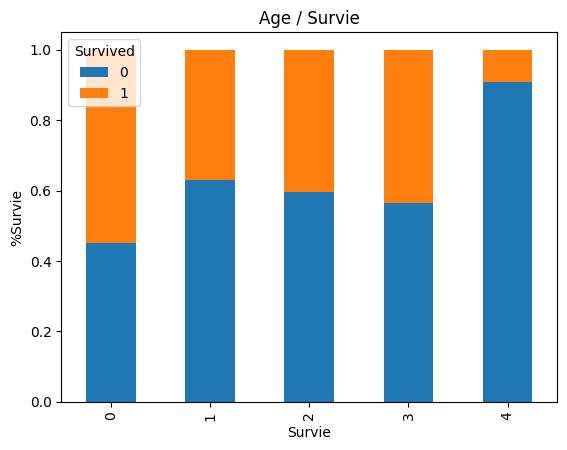

In [18]:
table= pd.crosstab(df.Age,df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Age / Survie')
plt.xlabel('Survie')
plt.ylabel('%Survie')

Text(0, 0.5, '')

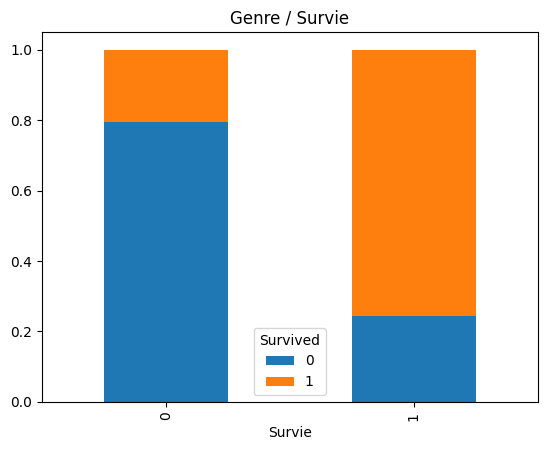

In [19]:
table= pd.crosstab(df.Sex,df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Genre / Survie')
plt.xlabel('Survie')
plt.ylabel('')

Text(0, 0.5, '')

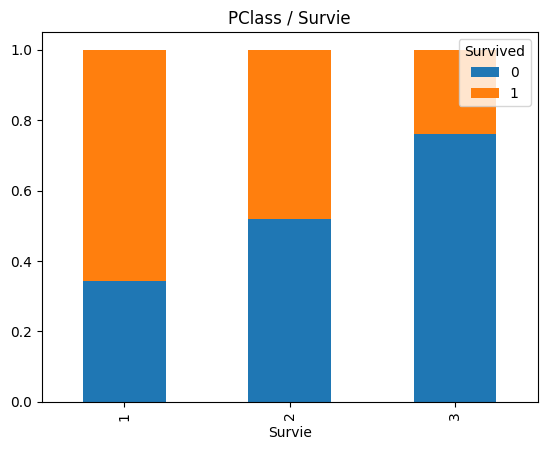

In [20]:
table= pd.crosstab(df.Pclass,df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('PClass / Survie')
plt.xlabel('Survie')
plt.ylabel('')

Text(0, 0.5, '')

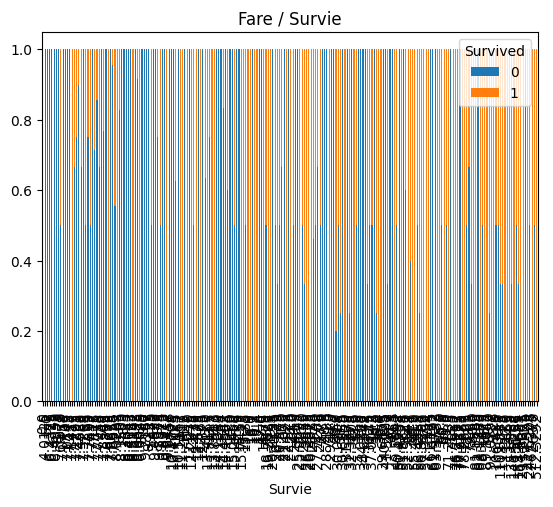

In [21]:
table= pd.crosstab(df.Fare,df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Fare / Survie')
plt.xlabel('Survie')
plt.ylabel('')

In [22]:
df['FareGroup'] = pd.qcut(df['Fare'],3)
df[['FareGroup', 'Survived']].groupby(['FareGroup'], as_index=False).mean().sort_values(by='FareGroup', ascending=True)

C:\Users\matthieu.catteyfaye\AppData\Local\Temp\ipykernel_17368\3202689067.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[['FareGroup', 'Survived']].groupby(['FareGroup'], as_index=False).mean().sort_values(by='FareGroup', ascending=True)


,FareGroup,Survived
0,"(-0.001, 10.462]",0.196653
1,"(10.462, 26.55]",0.460581
2,"(26.55, 512.329]",0.564103


In [23]:
df.loc[ df['Fare'] <= 10.462, 'Fare'] = 0
df.loc[(df['Fare'] > 10.462) & (df['Fare'] <= 26.55), 'Fare'] = 1
df.loc[ df['Fare'] > 26.55, 'Fare'] = 2
df['Fare'] = df['Fare'].astype(int)

df.drop(['FareGroup'], axis=1,inplace=True)

Text(0, 0.5, '')

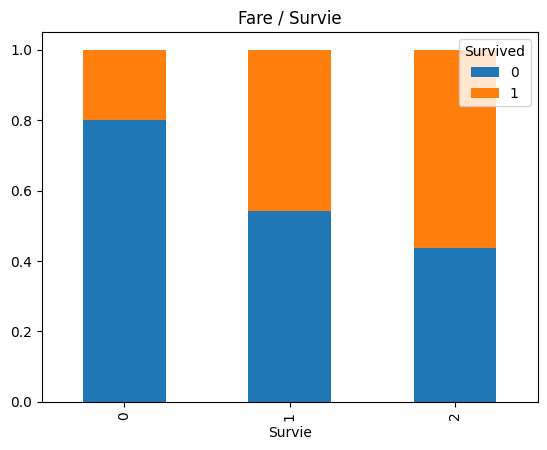

In [24]:
table= pd.crosstab(df.Fare,df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Fare / Survie')
plt.xlabel('Survie')
plt.ylabel('')

Text(0, 0.5, '')

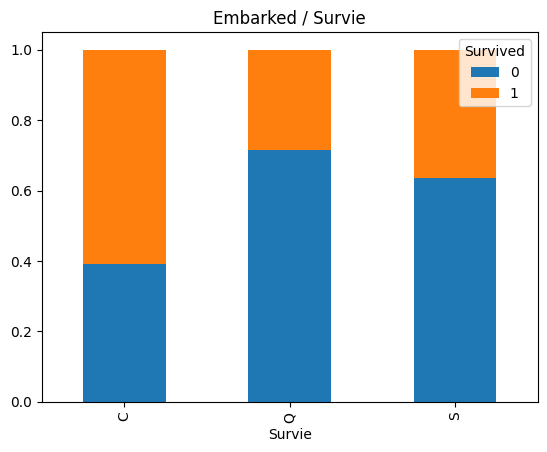

In [25]:
table= pd.crosstab(df.Embarked,df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Embarked / Survie')
plt.xlabel('Survie')
plt.ylabel('')

Text(0, 0.5, '')

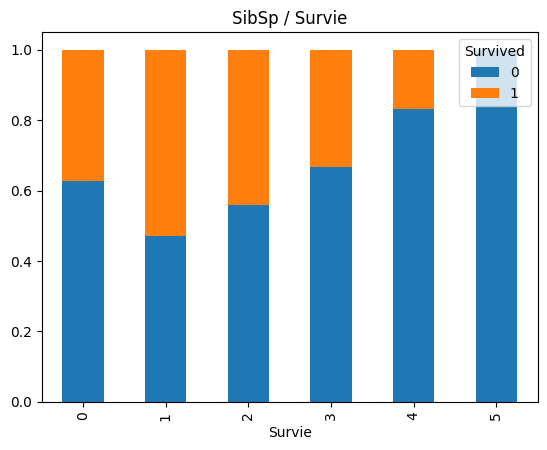

In [26]:
table= pd.crosstab(df.SibSp,df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('SibSp / Survie')
plt.xlabel('Survie')
plt.ylabel('')

Text(0, 0.5, '')

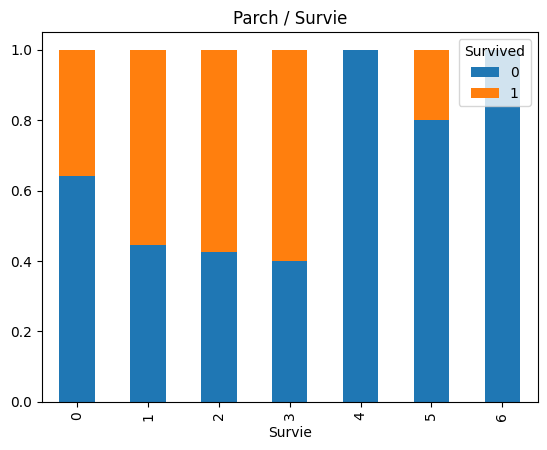

In [27]:
table= pd.crosstab(df.Parch,df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Parch / Survie')
plt.xlabel('Survie')
plt.ylabel('')

In [28]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

Text(0, 0.5, '')

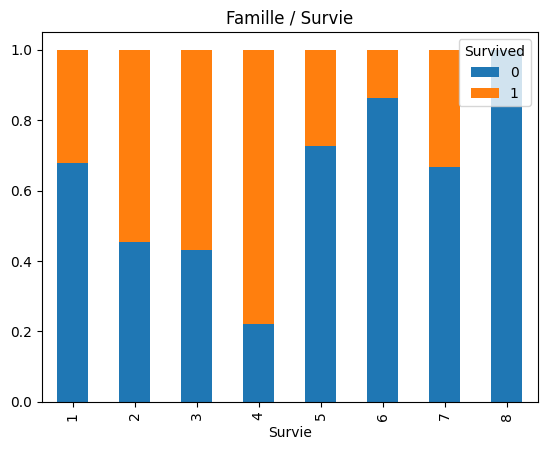

In [29]:
table= pd.crosstab(df.FamilySize,df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Famille / Survie')
plt.xlabel('Survie')
plt.ylabel('')

In [30]:
# Premier tri
df.drop(['SibSp','Parch'],axis='columns',inplace=True)

In [31]:
#Separation
Features = df.drop('Survived',axis='columns')
y = df.Survived
Features.head()
Features.shape

(714, 6)

In [32]:
Features.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,3,0,1,0,S,2
1,1,1,2,2,C,2
2,3,1,1,0,S,1
3,1,1,2,2,S,2
4,3,0,2,0,S,1


In [ ]:
Features.tail()

,Pclass,Sex,Age,Fare,Embarked,FamilySize
885,3,1,2,2,Q,6
886,2,0,1,1,S,1
887,1,1,1,2,S,1
889,1,0,1,2,C,1
890,3,0,1,0,Q,1


In [ ]:
# Ajustement des features
Features.drop(['Embarked','Pclass'],axis=1,inplace=True)

In [35]:
Features.head()

,Sex,Age,Fare,FamilySize
0,0,1,0,2
1,1,2,2,2
2,1,1,0,1
3,1,2,2,2
4,0,2,0,1


In [36]:
X_train, X_test, y_train, y_test = train_test_split(Features, y, test_size=0.3, random_state=0)

In [37]:
random_forest = RandomForestClassifier()

parameters = {'n_estimators': [3,4,5,10,15,20,25,30,35,40,45],'criterion': ['entropy', 'gini'], 'max_depth': [2, 3, 5, 10]}

grid_obj = GridSearchCV(random_forest, parameters, scoring=acc_scorer,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)
clf = grid_obj.best_estimator_
print(grid_obj.best_estimator_)
# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))
print(clf.score(Features,y))

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=3)
0.8316633266533067
0.8
0.8221288515406162
